# Lobster Assessment

In [29]:
# import lackages
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import READ_EDAB_Utilities_py as reupy
import numpy as np
import os
import geopandas as gpd
import cartopy.crs as ccrs

In [2]:
bt_m6 = xr.open_dataset('bt_mom6_M.nc')

In [5]:
# Assign directory
directory = "C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/bt_hubert/bt_revised_metadata_032024/"

bt = xr.open_dataset(directory + 'bottom_temp_1959.nc')

# Iterate over files in directory
for file in os.listdir(directory):
    filename = directory + file
    bt_yr = xr.open_dataset(directory + file)
    bt = xr.merge([bt, bt_yr])

In [9]:
# Average monthly for the cold pool indicator
bt_monthly = bt.resample(time = 'MS').mean()

In [47]:
# import shapefiles
gom = gpd.read_file('OCeanModelValidationPolygons/GOM/OceanProductPoly_GOM.shp')
in_SNE = gpd.read_file('OCeanModelValidationPolygons/inshore SNE/OceanProductPoly_SNEinshore.shp')
off_SNE = gpd.read_file('OCeanModelValidationPolygons/offshore SNE/OceanProductPoly_SNEoffshore.shp')

In [25]:
gom2 = gom.to_crs('EPSG:4326')

In [51]:
off_SNE

,FINSTR_ID,STRATA,A2,STRATUMA,Stock,LMA,Shape_Leng,Shape_Area,geometry
0,1060,1060,9950,01060,SNE,3,5.963349,1.675049,"POLYGON ((-71.66802 40.90022, -71.66564 40.897..."


In [53]:
bt_m6_gom = reupy.crop_nd(bt_m6, 'lon','lat', gom2)
#bt_m6_sne_in = reupy.crop_nd(bt_m6, 'lon','lat', inSNE)
bt_m6_sne_off = reupy.crop_nd(bt_m6, 'lon','lat', off_SNE)

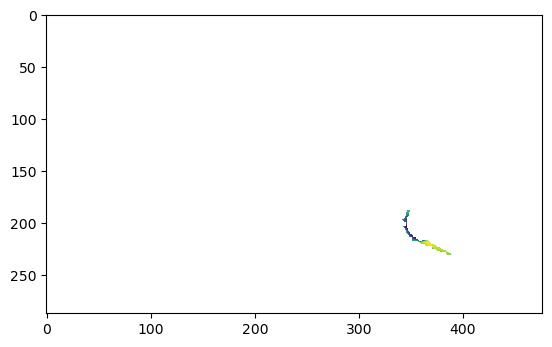

In [28]:
plt.imshow(bt_m6_gom.tob[10,:,:])

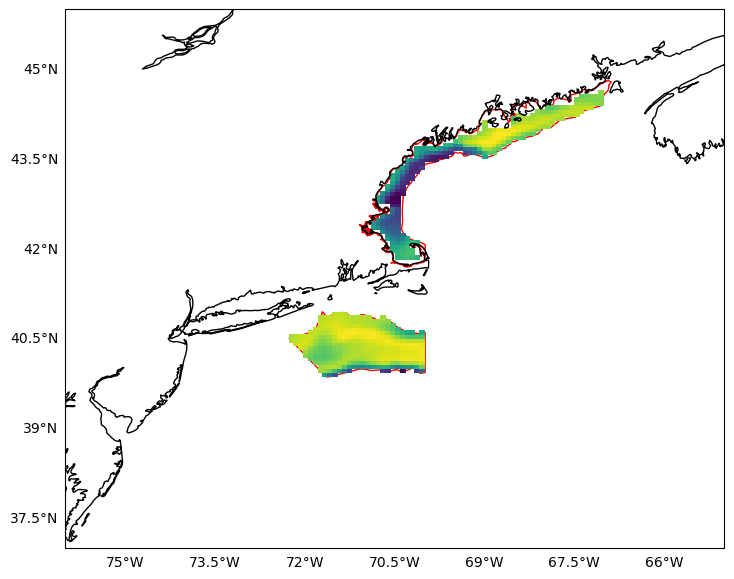

In [55]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(17, 7))
ax.set_extent([-76, -65, 37, 46], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
ax.add_geometries(gom2.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', zorder = 0)
ax.pcolor(bt_m6_gom.tob.lon, bt_m6_gom.lat, bt_m6_gom.tob[10,:,:], zorder = 1)
ax.add_geometries(off_SNE.geometry, crs = ccrs.PlateCarree(), facecolor = 'white', edgecolor = 'r', zorder = 0)
ax.pcolor(bt_m6_sne_off.tob.lon, bt_m6_sne_off.lat, bt_m6_sne_off.tob[10,:,:], zorder = 1)
